# Simulation Study- Life Expectancy vs selected national parameters

#### Executive summary:

Areal-world phenomenon was chosen that can be measured and for which > one-hundred data points across at least four different variables are available. <br>
The types of variables involved were investigated , their likely distributions, and their relationships with each other.<br>
A data set as closely matching their properties as possible was synthesised/simulated using the Numpy random functionality. <br>
Correlations between attributes with real-world and simulated data was further explored.

#### Download the required libraries from python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Plan:
1. Identify areas of interest
2. Source suitable data
3. Create a dataframe
4. Clean-up the dataset
5. Concatenate the relevant datasets (as required)
6. Check for correlations
7. Identify best data distribution
8. Generate simulated data
9. Merge simulated data into one dataframe
10. Plot data
11. Summary
    

#### 1. Identify areas of interest
#### 2. Source suitable dataset(s)

A thorough assessment of potential databases online was completed. Based on area of interest, the focus was on global healthcare and where there could be interesting correlations and data simulation could be attempted. One area of interest is the impact of outcomes (life expectancy) based on national spend on healthcare.Two suitable databases were identified:
1. Global Health Outcomes
2. World Bank Databases

These two databases comntained suitable attributes to trend and simulate.


#### 3. Create a dataframe

The data from Global Health Outcomes

In [2]:
df= pd.read_csv('data/global_health_outcomes_new.csv')

In [3]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0


In [4]:
df.sort_values(by=['Country'], inplace=True)

In [5]:
df['Country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
186     Venezuela 
187       Viet Nam
188          Yemen
189         Zambia
190       Zimbabwe
Name: Country, Length: 191, dtype: object

In [6]:
df.describe().round()

,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
count,189.0,189.0,189.0,189.0,140.0,189.0,189.0,94.0,190.0,114.0,181.0,187.0,185.0
mean,7.0,12.0,25.0,34.0,24.0,139.0,201.0,32.0,13.0,2.0,19.0,16.0,7.0
std,10.0,13.0,24.0,36.0,14.0,96.0,100.0,40.0,21.0,4.0,3.0,15.0,3.0
min,1.0,1.0,2.0,2.0,1.0,36.0,54.0,0.0,0.0,0.0,12.0,0.0,1.0
25%,1.0,3.0,7.0,8.0,11.0,67.0,116.0,0.0,1.0,0.0,17.0,2.0,5.0
50%,3.0,7.0,15.0,18.0,23.0,104.0,184.0,8.0,4.0,1.0,19.0,12.0,6.0
75%,7.0,16.0,39.0,51.0,34.0,196.0,261.0,66.0,17.0,1.0,22.0,28.0,9.0
max,65.0,75.0,107.0,167.0,59.0,492.0,577.0,153.0,143.0,23.0,26.0,77.0,20.0


In [7]:
# output the minimum of each row in data frame
df.min(axis=0)

Country                                                                       Afghanistan
Country.1                                                                     Afghanistan
Infants lacking immunization (% of one-year-olds) DTP 2013                            1.0
Infants lacking immunization (% of one-year-olds) Measles 2013                        1.0
Mortality rates (per 1,000 live births) Infant 2013                                   1.6
Mortality rates (per 1,000 live births) Under-five 2013                               2.0
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013            1.3
Adult mortality rate (per 1,000 people) Female 2013                                  36.0
Adult mortality rate (per 1,000 people) Male 2013                                    54.0
Deaths due to Malaria (per 100,000 people) 2012                                       0.0
Deaths due to Tuberculosis (per 100,000 people) 2012                                  0.0
HIV preval

In [8]:
# output the minimum of each row in data frame
df.max(axis=0)

Country                                                                       Zimbabwe
Country.1                                                                     Zimbabwe
Infants lacking immunization (% of one-year-olds) DTP 2013                        65.0
Infants lacking immunization (% of one-year-olds) Measles 2013                    75.0
Mortality rates (per 1,000 live births) Infant 2013                              107.2
Mortality rates (per 1,000 live births) Under-five 2013                          167.4
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013        59.3
Adult mortality rate (per 1,000 people) Female 2013                              492.0
Adult mortality rate (per 1,000 people) Male 2013                                577.0
Deaths due to Malaria (per 100,000 people) 2012                                  152.6
Deaths due to Tuberculosis (per 100,000 people) 2012                             143.0
HIV prevalence, adult (% ages 15-49) 2013  

In [9]:
df.columns

Index(['Country', 'Country.1',
       'Infants lacking immunization (% of one-year-olds) DTP 2013',
       'Infants lacking immunization (% of one-year-olds) Measles 2013',
       'Mortality rates (per 1,000 live births) Infant 2013',
       'Mortality rates (per 1,000 live births) Under-five 2013',
       'Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013',
       'Adult mortality rate (per 1,000 people) Female 2013',
       'Adult mortality rate (per 1,000 people) Male 2013',
       'Deaths due to Malaria (per 100,000 people) 2012',
       'Deaths due to Tuberculosis (per 100,000 people) 2012',
       'HIV prevalence, adult (% ages 15-49) 2013',
       'Life expectancy at age 60 (years) 2010/2015',
       'Physicians (per 10,000 people) 2001-2013',
       'Public health expenditure (% of GDP) 2013'],
      dtype='object')

In [10]:
df.mean(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      6.518519
Infants lacking immunization (% of one-year-olds) Measles 2013                 11.529101
Mortality rates (per 1,000 live births) Infant 2013                            25.412169
Mortality rates (per 1,000 live births) Under-five 2013                        34.403704
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     24.012857
Adult mortality rate (per 1,000 people) Female 2013                           138.582011
Adult mortality rate (per 1,000 people) Male 2013                             201.222222
Deaths due to Malaria (per 100,000 people) 2012                                32.374468
Deaths due to Tuberculosis (per 100,000 people) 2012                           13.013158
HIV prevalence, adult (% ages 15-49) 2013                                       2.038596
Life expectancy at age 60 (years) 2010/2015                                    19.398343
Physicians (per 10,00

In [11]:
df.std(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      9.610274
Infants lacking immunization (% of one-year-olds) Measles 2013                 12.704307
Mortality rates (per 1,000 live births) Infant 2013                            23.762985
Mortality rates (per 1,000 live births) Under-five 2013                        36.113546
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     14.495506
Adult mortality rate (per 1,000 people) Female 2013                            95.896830
Adult mortality rate (per 1,000 people) Male 2013                             100.082590
Deaths due to Malaria (per 100,000 people) 2012                                40.351072
Deaths due to Tuberculosis (per 100,000 people) 2012                           20.761653
HIV prevalence, adult (% ages 15-49) 2013                                       4.194212
Life expectancy at age 60 (years) 2010/2015                                     3.015635
Physicians (per 10,00

In [12]:
df.median(axis=0)

Infants lacking immunization (% of one-year-olds) DTP 2013                      3.00
Infants lacking immunization (% of one-year-olds) Measles 2013                  7.00
Mortality rates (per 1,000 live births) Infant 2013                            15.10
Mortality rates (per 1,000 live births) Under-five 2013                        17.50
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     22.70
Adult mortality rate (per 1,000 people) Female 2013                           104.00
Adult mortality rate (per 1,000 people) Male 2013                             184.00
Deaths due to Malaria (per 100,000 people) 2012                                 7.50
Deaths due to Tuberculosis (per 100,000 people) 2012                            4.05
HIV prevalence, adult (% ages 15-49) 2013                                       0.55
Life expectancy at age 60 (years) 2010/2015                                    19.10
Physicians (per 10,000 people) 2001-2013                         

---

### Plotting the data - take a look at shape

array([[<AxesSubplot:title={'center':'Physicians (per 10,000 people) 2001-2013'}>]],
      dtype=object)

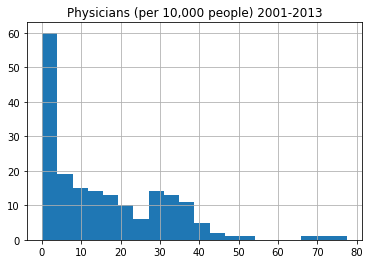

In [13]:
df.hist(column='Physicians (per 10,000 people) 2001-2013', bins = 20)

### random seed
Random seeds are also common to create reproducible results. <br>Fixing the seed is essential when we try to optimize a function that involves randomly generated number

---

### Fitting the data to a random distribution

In order to select the best numpy.random simulation the range of numpy random number generation statistical models was assessed. <br>
The mean and standard deviation ranges for each attribute was inputted to various statistical models below. <br>In order to select the best numpy.random simulation the range of numpy random number generation statistical models was assessed. <br>
---

In [14]:
# create a random seed to generate pseudo random numbers
import random
random.seed(10)

<br>

##### Physicians_per_100K
-----

[ 16.88018795  21.97513245   3.02814636  42.27343026  45.95793369
  28.56817107   3.15802615  20.4002698   45.5193273    6.96654441
  24.32870442  27.52463401  18.9367529   19.08752257  19.61648658
  17.397176    14.10052576   0.99130713  32.69006017   8.37257702
  10.88929869  19.17224809   5.02297421  34.70757826  13.05134972
   4.72344613  19.00059271  26.23675563  28.12536084  -8.46641398
  50.90007112  14.18018627  13.23650381  15.45710714   9.77934273
  18.9187049  -12.82919309   5.74169134  17.70138821  21.00221359
  11.32520125   5.3982758    8.69494284  17.927955    -6.65869613
  10.00182574  14.14960526   0.41096944  24.03457255  14.31824835
   7.40049604   8.01314092  17.94894195   3.79672491   7.95793878
 -14.78604051  30.92675882  16.39620796  20.34623607 -10.62068628
  25.26853844   9.86704127  25.48873143   5.98220788  60.05949276
  14.01390235   7.17846518  17.10745956  -2.84135329  12.18632428
  36.01539772  25.62392548  19.11696036   3.68978626   9.16384515
   7.95267

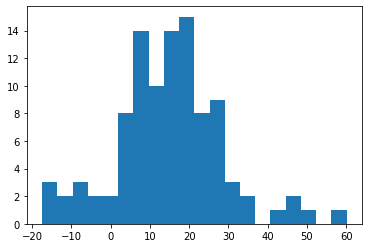

In [15]:
# create a random array with the mean and std. dev. of the original data [NORMAL]
Physicians_per_100K = np.random.normal(loc=15.94, scale=15.28, size=100)
plt.hist(Physicians_per_100K, bins = 20)
#plt.show()
print(Physicians_per_100K)

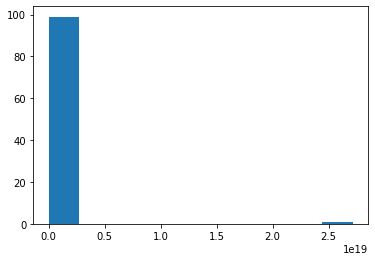

In [16]:
# create a random array with the mean (16) and stdev (15) of the original data [LOGNORMAL]
Physicians_per_100K = np.random.lognormal(16,15,100)
plt.hist(Physicians_per_100K, bins = 10);

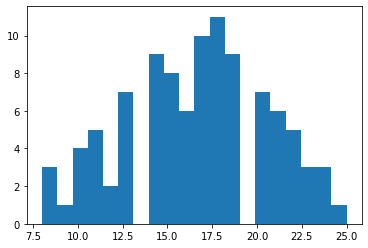

In [17]:
# create a random array with the mean (16) of the original data [POISSON]
Physicians_per_100K = np.random.poisson(16,100)
plt.hist(Physicians_per_100K, bins = 20);

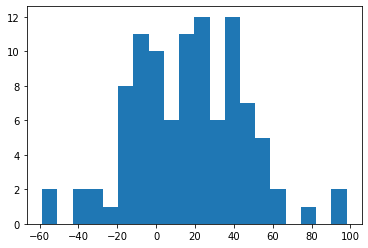

In [18]:
# create a random array with the mean (16) and stdev (15) of the original data [LOGISTIC]
Physicians_per_100K = np.random.logistic(16,15,100)
plt.hist(Physicians_per_100K, bins = 20);

##### Conclusion: Physicians_per_100K does not follow a range of statistical distributions

##### Alternate path for randomized data is to use the random.choice function in numpy
---

In [19]:
# use the random choice function in numpy to create a new array of 'randomized' data for simulation
df2 = np.random.choice((df['Physicians (per 10,000 people) 2001-2013']), size =100)

In [20]:
df2

array([14.7, 37. ,  1. , 15.9,  8.3, 16. ,  1.8,  8.3,  0.4, 26.9, 15.9,
       16.9,  4.7,  6.1,  8.3,  0.8, 11.7,  3.7,  0.6, 32.6, 34.8, 77.4,
       12.1,  3.8, 11.1,  0.7, 31.5,  9.1, 67.2,  1.3,  4.3, 71.7, 27.9,
       10.2,  2. , 37.4, 38.1, 38.1,  0.7, 51.3, 28.8, 32.6, 12. , 19. ,
        nan, 41.2,  2.6, 39.4,  2.2, 20.7, 19.6,  0.5,  4.1,  2.3, 15. ,
       16.9, 35.8, 35.8,  1.3, 31.5, 42.4,  3.6, 22.9,  6.8, 27.2,  3. ,
       14.6, 31.5, 27.2, 11.1,  0.7,  1.7,  0.4,  3.9,  1.3,  2.1, 32. ,
        7.8,  4.7,  6.6, 14.2,  2.1,  0.1, 27.4, 21.4, 11.3,  1.6,  1.2,
        9.3,  5.3, 17.1, 23. ,  0.4, 19.6, 41.2, 23.8, 33.5, 32.7, 41.8,
        6.1])

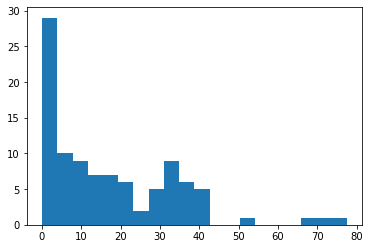

In [21]:
plt.hist(df2, bins = 20)
plt.show()

##### Conclusion:  random.choice function in numpy simulates the original dataset (shape/distribution)
---

In [22]:
# # create a random array with the mean and std. dev.of the original data
# Physicians_per_100K = np.random.normal(loc=15.787255, scale=14.877931, size=100)
# print(Physicians_per_100K)

<br>

##### Public health expenditure (% of GDP) 2013
---

array([[<AxesSubplot:title={'center':'Public health expenditure (% of GDP) 2013'}>]],
      dtype=object)

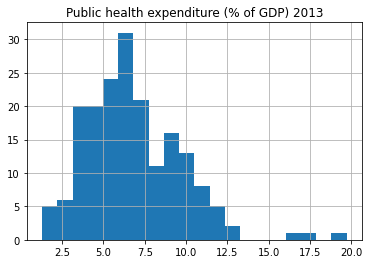

In [23]:
df.hist(column='Public health expenditure (% of GDP) 2013', bins = 20)

In [24]:
height = df['Public health expenditure (% of GDP) 2013'].values

In [25]:
# create a random array with the mean and std. dev. of the original data
Public_health_expenditure_percent_GDP = np.random.normal(loc=6.767980, scale=2.838771, size=1000)

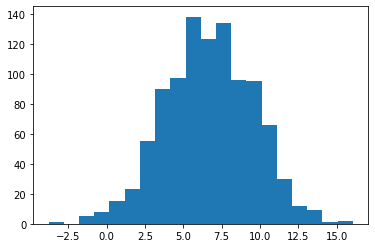

In [26]:
# check the shape of the data
plt.hist(Public_health_expenditure_percent_GDP, bins = 20)
plt.show()

##### Conclusion: Public_health_expenditure_percent_GDP follows a normal distribution
---

<br>

##### Life expectancy at age 60 (years) 2010/2015
---

array([[<AxesSubplot:title={'center':'Life expectancy at age 60 (years) 2010/2015'}>]],
      dtype=object)

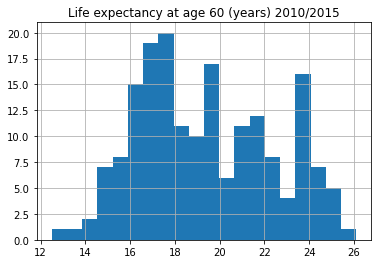

In [27]:
df.hist(column='Life expectancy at age 60 (years) 2010/2015', bins = 20)

In [28]:
# create a random array with the mean and std. dev. of the original data
Life_Expectancy_at_60 = np.random.normal(loc=19.355500, scale=2.938134, size=1000)

In [29]:
# check the correlation plt.hist(Life_Expectancy_at_60, bins = 20)
plt.show()

##### Conclusion: Life_Expectancy_at_60 follows a normal distribution
---


### Summary

The data for 'Physicians (per 10,000 people) 2001-2013' was a poor fit for the following random generators:
- normal
- lognormal
- logisitic
- poisson <br>

The decision was made to use the  **random choice** function in numpy to create a new array of 'randomized' data for simulation <br>

The data for 'Life expectancy at age 60 (years) 2010/2015', and 'Public health expenditure (% of GDP) 2013' was found to approximate to a normal distribution.<br>
The decision was made to use the **random.normal** function in numpy for random array genetration. <br> <br>
https://numpy.org/doc/1.16/reference/routines.random.html

---

#### 2b. Source suitable data not in current dataset (GDP)
#### 3b. Create a dataframe


In [30]:
df2= pd.read_csv('data/GDP per capita_new.csv')

In [31]:
df2

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,..,..,179.43,190.68,211.38,242.03,263.73,359.69,364.66,437.27,543.31,591.19,638.85,624.32,614.22,556.01
1,Albania,ALB,1126.68,1281.66,1425.12,1846.12,2373.58,2673.79,2972.74,3595.04,4370.54,4114.13,4094.35,4437.14,4247.63,4413.06,4578.63,3952.80
2,Algeria,DZA,1765.03,1740.61,1781.83,2103.38,2610.19,3113.09,3478.71,3950.51,4923.63,3883.27,4480.79,5455.68,5592.22,5499.59,5493.06,4177.89
3,Andorra,AND,21854.25,22970.51,25067.24,32272.85,37966.19,40064.22,42674.76,47804.85,48719.66,43504.22,40850.25,43334.81,38686.46,39540.72,41303.93,35770.78
4,Angola,AGO,556.84,527.33,872.49,982.96,1255.56,1902.42,2599.57,3122.00,4080.94,3122.78,3587.88,4615.47,5100.10,5254.88,5408.41,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,VEN,4842.04,4986.68,3700.88,3272.62,4325.70,5504.98,6833.38,8454.47,11432.75,11765.10,13825.36,10955.54,12986.22,12457.77,16055.65,..
187,Vietnam,VNM,390.09,404.81,430.05,480.58,546.91,687.48,784.37,906.28,1149.42,1217.27,1317.89,1525.12,1735.15,1886.69,2030.28,2085.10
188,Yemen,YEM,554.45,550.36,579.85,620.38,709.97,832.84,921.42,1017.29,1229.25,1116.08,1334.78,1374.62,1446.54,1607.15,1674.00,1601.83
189,Zambia,ZMB,345.69,382.94,382.24,435.46,538.59,702.74,1047.92,1124.29,1394.00,1159.91,1489.46,1672.91,1763.07,1878.35,1762.43,1338.29


In [32]:
df2['2015']

0        556.01
1       3952.80
2       4177.89
3      35770.78
4       4166.98
         ...   
186          ..
187     2085.10
188     1601.83
189     1338.29
190     1445.07
Name: 2015, Length: 191, dtype: object

In [33]:
# the existing dataframe is an object and requires to be transformed to numeric (float) for processing
df2['2015'] = pd.to_numeric(df2['2015'],errors = 'coerce')

In [34]:
df2['2015']

0        556.01
1       3952.80
2       4177.89
3      35770.78
4       4166.98
         ...   
186         NaN
187     2085.10
188     1601.83
189     1338.29
190     1445.07
Name: 2015, Length: 191, dtype: float64

In [35]:
gdp_2015 = df2['2015']

---
#### 4 Clean-up the dataset
Dataframe manual clean-up:
"Ð" (5 iterations in df) = replaced with "-" manually using notepad++ before concatenating

Manual comparison of datasets identified there was misalignment of data for some countries/regions. <br> These were manually corrected/deleted using Notepad++ until both dastaset rows (country) matched.<br>

#### 5. Concatenate the relevant datasets (add GDP to existing dataset)


In [36]:
df=df.join(gdp_2015)

In [37]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013,2015
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1,556.01
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9,3952.80
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6,4177.89
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1,35770.78
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4,NaN
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0,2085.10
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4,1601.83
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0,1338.29


In [38]:
df.rename(columns = {"Life expectancy at age 60 (years) 2010/2015": "Life expectancy +60","Physicians (per 10,000 people) 2001-2013": "Physicians per 10K pop.","Public health expenditure (% of GDP) 2013": "Pub_Health Exp (%GDP)","2015": "GDP"}, 
          inplace = True)

---
#### 4. Clean-up the dataset (continued)


In [39]:
df

,Country,Country.1,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy +60,Physicians per 10K pop.,Pub_Health Exp (%GDP),GDP
0,Afghanistan,Afghanistan,14.0,25.0,70.2,97.3,59.3,232.0,252.0,0.2,37.0,0.1,15.9,2.3,8.1,556.01
1,Albania,Albania,1.0,1.0,13.3,14.9,23.1,85.0,118.0,NaN,0.3,0.1,21.1,11.5,5.9,3952.80
2,Algeria,Algeria,1.0,5.0,21.6,25.2,15.9,121.0,164.0,0.0,15.0,0.1,17.9,12.1,6.6,4177.89
3,Andorra,Andorra,2.0,5.0,2.2,3.0,NaN,43.0,90.0,NaN,0.9,NaN,NaN,37.0,8.1,35770.78
4,Angola,Angola,3.0,9.0,101.6,167.4,29.2,322.0,372.0,100.9,42.0,2.4,15.7,1.7,3.8,4166.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,Venezuela (Bolivarian Republic of),10.0,15.0,12.9,14.9,13.4,88.0,198.0,2.2,2.4,0.6,21.1,19.4,3.4,NaN
187,Viet Nam,Viet Nam,17.0,2.0,19.0,23.8,23.3,69.0,189.0,0.2,20.0,0.4,22.4,11.6,6.0,2085.10
188,Yemen,Yemen,6.0,22.0,40.4,51.3,46.6,211.0,255.0,10.0,5.6,0.1,16.2,2.0,5.4,1601.83
189,Zambia,Zambia,14.0,20.0,55.8,87.4,45.8,303.0,356.0,79.2,28.0,12.5,17.0,0.7,5.0,1338.29


In [40]:
df3 = df[['Pub_Health Exp (%GDP)','Physicians per 10K pop.','GDP','Life expectancy +60']]

In [41]:
# new dataframe contains the 4 variables of interest
# the 'country' column was purposefully not carried forward
df3

,Pub_Health Exp (%GDP),Physicians per 10K pop.,GDP,Life expectancy +60
0,8.1,2.3,556.01,15.9
1,5.9,11.5,3952.80,21.1
2,6.6,12.1,4177.89,17.9
3,8.1,37.0,35770.78,NaN
4,3.8,1.7,4166.98,15.7
...,...,...,...,...
186,3.4,19.4,NaN,21.1
187,6.0,11.6,2085.10,22.4
188,5.4,2.0,1601.83,16.2
189,5.0,0.7,1338.29,17.0


In [42]:
#check the new dataframe properites
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pub_Health Exp (%GDP)    185 non-null    float64
 1   Physicians per 10K pop.  187 non-null    float64
 2   GDP                      188 non-null    float64
 3   Life expectancy +60      181 non-null    float64
dtypes: float64(4)
memory usage: 11.5 KB


In [43]:
df3.describe().round()

,Pub_Health Exp (%GDP),Physicians per 10K pop.,GDP,Life expectancy +60
count,185.0,187.0,188.0,181.0
mean,7.0,16.0,14670.0,19.0
std,3.0,15.0,23736.0,3.0
min,1.0,0.0,293.0,12.0
25%,5.0,2.0,1923.0,17.0
50%,6.0,12.0,5539.0,19.0
75%,9.0,28.0,16109.0,22.0
max,20.0,77.0,167313.0,26.0


<br>

#### Now that the 4 attributes of interest are in one dataframe the next step is to plot the two sets of data: <br>

1. original data
2. simulated data
---


#### 6. Check for correlations


The sns pairplot plots the various attributes visually in a correlation matrix.

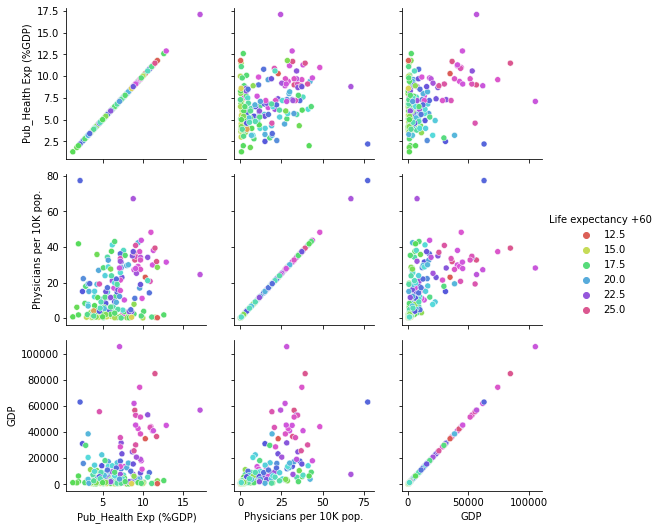

In [44]:
x = sns.PairGrid(df3, hue='Life expectancy +60', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- The strongest correlation is between 'GDP' vs 'Physicians per 10K' affirming country wealth has a correlation to # of physicians
- There is weak positive correlation between 'GDP' and 'Pub_Health Exp (%GDP)' showing difference in public spending policy between countries
- 'Life expectancy at 60' is directly correlated to 'GDP' with a weaker correlation to 'Physicians per 100K' and 'Pub_Health Exp (%GDP)'
- The weakest correlation is between 'Physicians per 10K' and 'Pub_Health Exp (%GDP)'

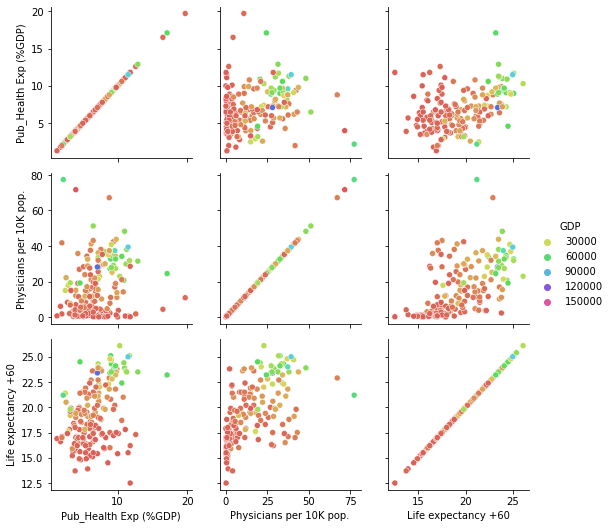

In [45]:
x = sns.PairGrid(df3, hue='GDP', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between 'Life expectancy at 60' and 'Physicians per 10K'
- There is a weaker positive correlation between 'Life expectancy at 60' and 'Pub_Health Exp (%GDP)'
- There is a weak relationship between 'Physicians per 10K' and 'Life expectancy at 60' <br>
with perhaps two separate populations present one for low numbers of physicians


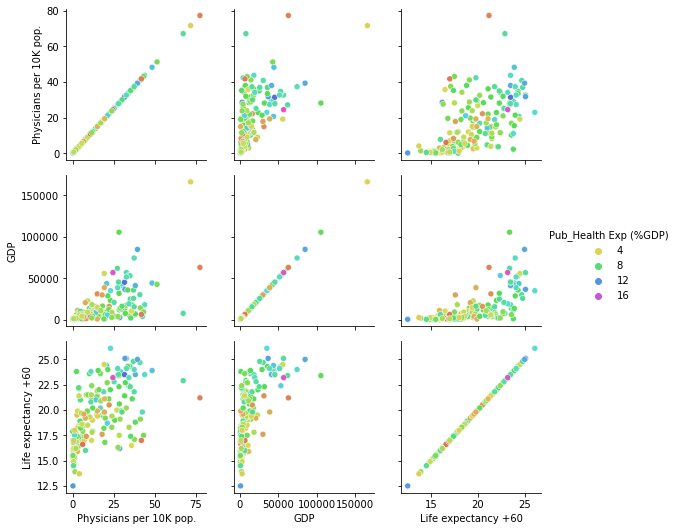

In [46]:
x = sns.PairGrid(df3, hue='Pub_Health Exp (%GDP)', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between'Physicians per 10K'and 'Life expectancy at 60' similar to seen in the above 'GDP' pairplot 
- Based on the hue:  'Pub_Health Exp (%GDP)' has an effect on life expectancy
- There is weak/no correlation between 'GDP' and 'Physicians per 10K' and perhaps surprisingly 'GDP' and 'Life expectancy at 60


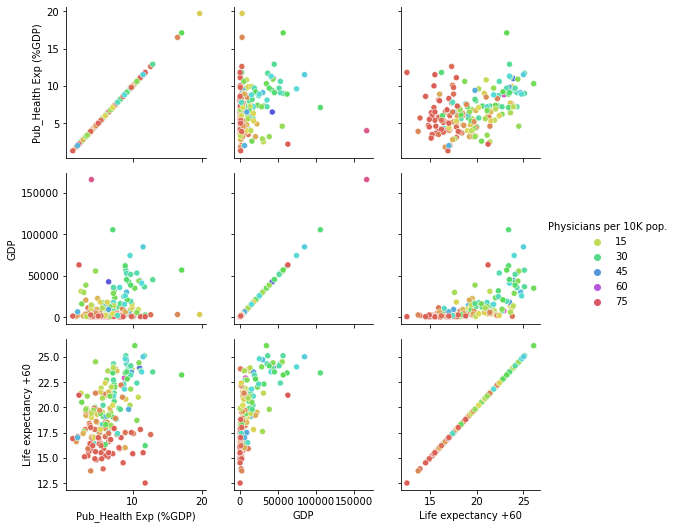

In [47]:
x = sns.PairGrid(df3, hue='Physicians per 10K pop.', palette='hls').map(sns.scatterplot)
x.add_legend()
plt.show()

The following can be ascertained from the above plot:

- There is a positive correlation between'Physicians per 10K'and 'Life expectancy at 60' similar to seen in the above 'GDP' pairplot 
- Based on the hue 'Physicians per 10K' is inversely correlated with 'Life expectancy at 60'.  
This is surprising and shows additional doctors do not lead to better health outcomes. Other hidden factors may need to be included.


---
#### 7. Identify best data distribution

The four attributes to be simulated are: 'GDP' 'Physicians per 10K' 'Pub_Health Exp (%GDP)' 'Life expectancy at 60'. <br>
Based on the assessment of the datasets and use of different numpy.random distributions available:

For **Public Health expenditure as a percentage of GDP** and **Life Expectancy** the data whne plotted (histogram) followed a standard normal distribution. <br>Thus a normal distribution is an acceptable model of these variables.  Thus the mean and standard deviation were used to draw random samples from a normal (Gaussian) distribution for simulation purposes. <br><br>
For **Physicians per 10K** when plotted, the distribution does not follow a normal distribution.  <br> Attempts to fit the data to other numpy available statistical distributions were not successful. <br>The *random choice* function in *NUMPY* generates a random sample from a given 1-D array.  <br> This allows generation of a dataset from parent data thast reflects the distribution but is a randomized version for simulation purposes. <br><br>
For **GDP data**, the mean and standard deviation were used to draw random samples from a normal (Gaussian) distribution for simulation purposes.  <br> However these returned both positive and negative numbers.  Instead the *random choice* function in *NUMPY* was again used to generate a random sample from the original master data. <br>

---

 


#### 8. Generate simulated data

In [48]:
# create a random array with the mean and std. dev. of the original data
Pub_Health_Exp_percentGDP_sim = np.random.normal(loc=7, scale=3.0, size=100)
print(Pub_Health_Exp_percentGDP_sim)

[ 7.0946749   8.47998896  8.14053782 12.0607176  12.95220372  7.81056682
  9.24430621  6.70766056  9.7965469  12.05708716  9.64367509 13.37109986
  9.88771162 -0.18447678  7.97620013  9.07930035  8.95238215  6.83506062
 11.19888082  6.6346985   6.70968252  9.86252618  5.99742897 12.4599995
  1.65078999  8.17849867  6.91379467  6.27963751  2.18151737  7.92639194
  4.347344    9.26534463  7.52273384  8.10079909  8.93884115  6.91924573
  8.06421371  9.54346     7.94218656 12.62828245 10.93436944  6.29013415
  8.59576614  3.47768128  6.42483938  6.96774594  4.43322002  7.55837427
 12.2969332  10.36662774  3.1000743   5.87890708 10.00124772  4.88120881
 11.47137124  2.15295208  4.76971197  7.09342662  4.85354515  8.86691323
  9.64097824  7.16757393 11.04629733  7.87380984  5.9687494   5.01158765
  4.57557032  6.47539202 10.92495134  6.78552923 10.57448216  7.80298565
  9.68830046 -0.63598932  4.40977472  7.92457752  7.28718644  3.99615891
  3.91012989  6.02306147 10.03863647  4.49366638  5.

In [49]:
# create a random array from the original dataset and numpy.random.choice of the original data
Physicians_per_10K_pop_sim = np.random.choice((df3['Physicians per 10K pop.']), size =100)
print(Physicians_per_10K_pop_sim)

[ 1.  15.   0.5  4.7  7.1 37.4 11.3 28.4  6.6  0.6 12.2  2.9  1.6  0.8
 19.2  8.3 11.6 36.2 28.4  4.1 22.   0.6 18.1  2.2  1.1 31.5 37.4  4.7
  1.6 41.2  1.8  3.   0.5 37.4  2.3 27.2  0.4 11.6  5.3 32.6 20.7 31.6
 11.8  4.7  6.1  4.1  1.8 71.7  2.3 16.9 15.5  1.1  1.8 67.2  0.1  1.1
 34.2  nan 35.8  0.4  nan  nan  1.3  7.8 14.9 48.3  1.8 71.7 14.6 15.1
  6.2 37.6 14.6 39.4 21.4 28.2 39.4 16.   0.5 28.6  3.   2.3 35.   2.1
  0.7  3.7 40.9 12.   3.7  0.7  6.2  3.8 28.8  1.3  2.2  1.8 17.1  2.3
 25.6 15. ]


In [50]:
# create a random array with the mean and std. dev. of the original data
Life_expectancy_plus60_sim = np.random.normal(loc=19, scale=3, size=100)
print(Life_expectancy_plus60_sim)

[16.79134269 21.91313024 18.3276351  21.88057487 14.40866672 21.82343841
 12.97791703 21.16092824 24.1303239  19.61991781 28.33210047 12.76351744
 15.08322367 19.42869903 24.92314551 18.77837612 18.50557666 18.54384176
 14.69583657 23.54007221 17.97566949 19.57127106 19.20369856 19.04810474
 20.98689642 16.3934823  15.43834338 17.01366128 22.72050712 21.60148491
 25.70176124 15.20075054 13.64831078 16.30171414 14.49276048 23.60211162
 21.80986468 16.89114057 17.32536657 19.12340593 17.30289066 18.43094744
 17.97072212 21.31955794 16.29954197 18.96027053  9.96176036 17.14370744
 14.98790769 18.51744879 17.02156031 21.9719456  19.54926013 15.26804932
 24.40860795 18.75012586 22.01396852 23.01927099 21.93818684 17.17396728
 13.89970903 14.21825352 23.0695826  17.65050525 21.09064246 19.83772572
 18.67871453 15.71695894 18.37373671 22.3558628  22.47980056 21.66913643
 23.12534684 20.46227548 25.44139474 25.87842457 22.3585189  19.49996673
 20.82704913 16.68956021 13.86323361 16.1936751  20

In [51]:
# create a random array from the original dataset and numpy.random.choice of the original data
# use of numpy.random.normal using the the mean and std. dev. of the original data gave negative values
# therefore the function numpy,random.choice was preferred
GDP_sim2 = np.random.choice((df3['GDP']), size =100)
print(GDP_sim2)

[  1584.78  28732.23  16033.46   4166.98   2687.48    293.46       nan
   5840.05    497.32  11006.28    377.42   9168.24  18076.61  35808.44
  52951.68   4688.32  56863.37  31164.04   4014.19  18214.46  16335.65
   4071.93  31164.04   7694.01   4904.33    640.54  30230.23  10093.62
  42662.9   17829.7   45404.57   1121.08  63039.11   4164.11   2286.2
   6514.27  52951.68   9313.01  45404.57    484.15  16524.9   40991.81
   4770.23   6229.1    3199.89   1121.08  20627.93    947.93  35770.78
   1219.25  61987.55   4177.89   3705.58   2286.2   23408.34   1332.79
   1605.61   2679.35  11283.4     901.75  20881.77  24921.6   14285.33
   7694.01   1386.85   2906.62   1972.55  16524.9    2695.67  38630.73
   1774.07   3875.32   6921.52    589.86  11933.38   4904.33    640.54
  10510.77       nan  56863.37  56863.37   6514.27   6175.88  14745.34
  63039.11   7384.7  167313.27   1356.67    947.93  17395.04  55646.62
   2167.12    588.23   2085.1     305.55   3331.7     947.93   6229.1
   5840.

In [52]:
# remove the standard scientific notation for arrays for display purposes
np.set_printoptions(suppress=True)

---
#### 9. Merge simulated data into one dataframe

In [53]:
Col1= Pub_Health_Exp_percentGDP_sim
Col2= Physicians_per_10K_pop_sim
Col3= GDP_sim2
Col4= Life_expectancy_plus60_sim

simulation_df= np.stack([Col1,Col2,Col3,Col4], axis=1)
simulation_df = pd.DataFrame(simulation_df, columns = ['%GDP spend on Health','Phys. per 10K_sim','GDP_sim','Life_Exp_sim'])

print(simulation_df)
print(type(simulation_df))

    %GDP spend on Health  Phys. per 10K_sim   GDP_sim  Life_Exp_sim
0               7.094675                1.0   1584.78     16.791343
1               8.479989               15.0  28732.23     21.913130
2               8.140538                0.5  16033.46     18.327635
3              12.060718                4.7   4166.98     21.880575
4              12.952204                7.1   2687.48     14.408667
..                   ...                ...       ...           ...
95              9.270249                1.8   3331.70     15.671583
96              2.673023               17.1    947.93     18.059588
97              4.911876                2.3   6229.10     13.308628
98              4.210740               25.6   5840.05     15.915681
99             10.003861               15.0  25732.02     22.104448

[100 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


---
#### 10. Plot data (simulated data)

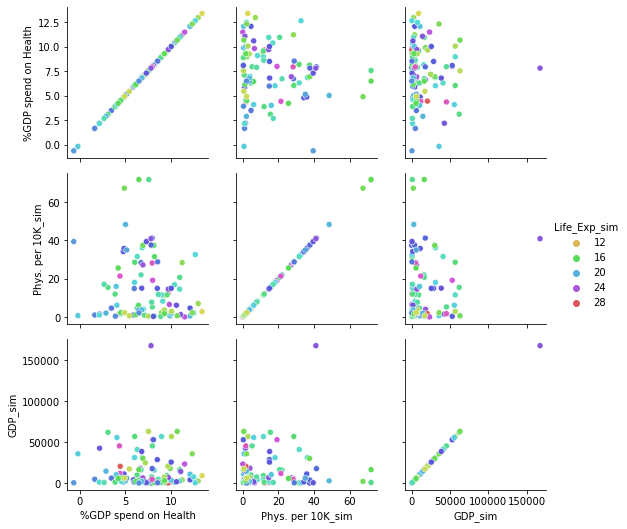

In [54]:
y = sns.PairGrid(simulation_df, hue='Life_Exp_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data
- To ensure simulated data reflects the same correlations to the original data requires:
1.  a strong and predictable correlation between each attribute i.e. y =mx +C
2. This function needs to be incorporated in the transformation of the data from parent to simulated dataset

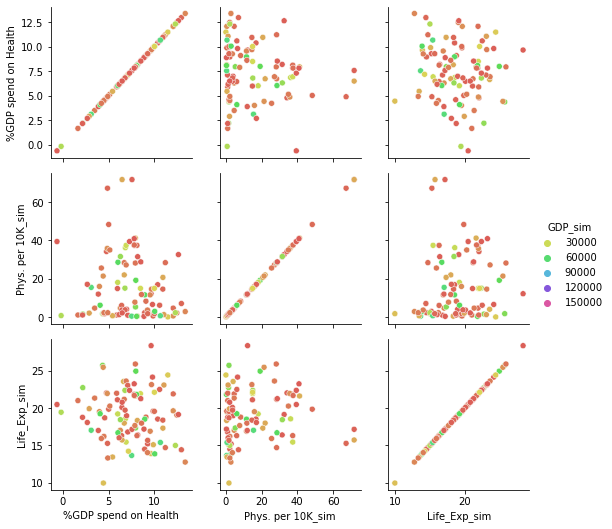

In [55]:
y = sns.PairGrid(simulation_df, hue='GDP_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


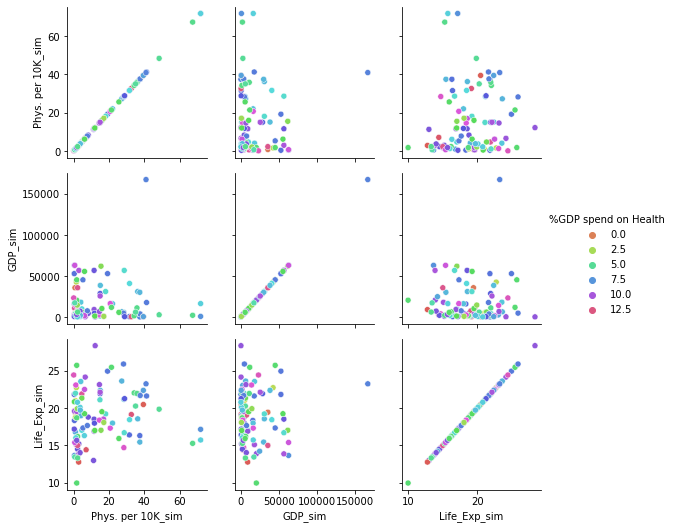

In [56]:
y = sns.PairGrid(simulation_df, hue='%GDP spend on Health', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


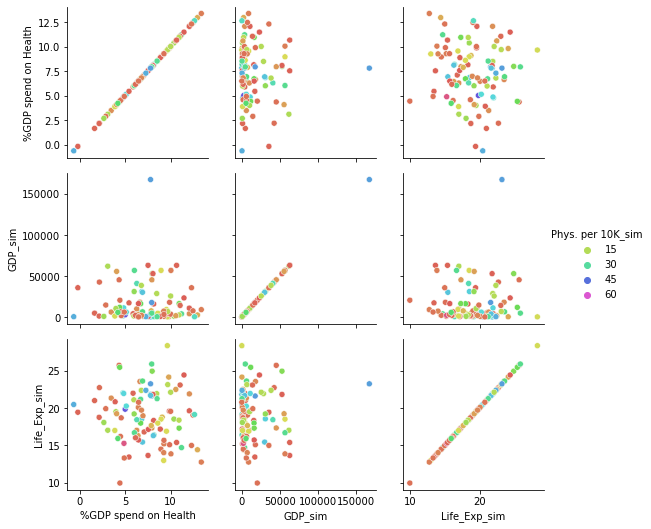

In [57]:
y = sns.PairGrid(simulation_df, hue='Phys. per 10K_sim', palette='hls').map(sns.scatterplot)
y.add_legend()
plt.show()

The following can be ascertained from the above plot:

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.


---
#### 11. Summary

- For the original dataset there were weak correlations between the attributes as seen in the pairplot
- However due to the additional randomization the correlations seen with the original dataset have been randomized
- In summary simple randomization of each data separately has weakened the previously seen correlations with the parent data.
- To ensure simulated data reflects the same correlations to the original data requires:
1.  a strong and predictable correlation between each attribute i.e. y =mx +C
2. This function needs to be incorporated in the transformation of the data from parent to simulated dataset

#### References

#### datascience
https://www.dataquest.io/?rfsn=5483552.4913b2c
#https://www.dataquest.io/?rfsn=5483552.4913b2c

#### data science ideas
https://www.analyticsvidhya.com/blog/2021/04/interesting-kaggle-datasets-every-beginner-in-data-science-should-try-out/
https://www.kaggle.com/spscientist/student-performance-in-exams
https://www.kdnuggets.com/2021/11/19-data-science-project-ideas-beginners.html <br>
https://www.stratascratch.com/blog/19-data-science-project-ideas-for-beginners/<br>
https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps<br>


#### datasets
https://data.world/hdro/d41b5824-e40e-4fd6-9c8f-900eb2616f3c/workspace/project-summary?agentid=hdro&datasetid=d41b5824-e40e-4fd6-9c8f-900eb2616f3c<br>
https://databank.worldbank.org/home.aspx<br> 
https://databank.worldbank.org/databases/health<br>
https://data.humdata.org/dataset/health-outcomes<br>
https://data.humdata.org/organization/undp-human-development-reports-office<br>
https://github.com/awesomedata/awesome-public-datasets <br>
https://data.gov.ie/<br>
https://ourworldindata.org/meat-production<br>
https://www.kaggle.com/datasets<br>
https://archive.ics.uci.edu/ml/index.php  (contains the iris dataset)<br>
https://databank.worldbank.org/home.aspx<br>

#### merging columns in datasets
https://www.kite.com/python/answers/how-to-append-a-column-from-a-pandas-dataframe-to-another-dataframe-in-python<br>

##### scraping datasets
https://www.edureka.co/blog/web-scraping-with-python/<br>

##### Maths for Data Analytics
https://www.kdnuggets.com/2020/06/8-basic-statistics-concepts.html<br>


#### model and synthesise data using Python

###### which distribution fits my data
https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9<br>
https://www.easytweaks.com/pandas-mean-column-dataframe/<br>
https://stackoverflow.com/questions/60738292/generate-random-data-based-on-existing-data<br>
https://python-course.eu/numerical-programming/synthetical-test-data-with-python.php)<br>
https://stackoverflow.com/questions/49855569/how-to-generate-random-numbers-to-satisfy-a-specific-mean-and-median-in-python<br>
https://www.sharpsightlabs.com/blog/numpy-random-choice/<br>
https://stackoverflow.com/questions/49860753/generating-random-dataframes-using-unique-elements-from-an-existing-dataframe-us<br>
https://stackoverflow.com/questions/59522783/how-to-generate-synthetic-data-with-random-values-on-pandas-dataframe<br>
https://stackoverflow.com/questions/50791731/how-can-i-create-random-additional-rows-and-append-it-to-an-existing-data-frame<br>
https://stackoverflow.com/questions/66948793/how-to-create-dataframe-by-randomly-selecting-from-another-dataframe<br>
https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/<br>
https://stackoverflow.com/questions/4265988/generate-random-numbers-with-a-given-numerical-distribution<br>
https://stackoverflow.com/questions/55750306/how-to-generate-bounded-random-array-based-on-mean-and-standard-deviation-of-ano<br>
https://www.datacamp.com/community/tutorials/generate-data-trumania<br>
https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae<br>
https://stats.stackexchange.com/questions/215938/generate-synthetic-data-to-match-sample-data<br>
https://www.programcreek.com/python/example/57185/numpy.random.multivariate_normal<br>

##### cleaning datasets
https://realpython.com/python-data-cleaning-numpy-pandas/<br>
https://www.easytweaks.com/pandas-mean-column-dataframe/<br>

### convert concatenated array to df
https://datatofish.com/numpy-array-to-pandas-dataframe/<br>

#### numpy print options (remove scientific format)
https://stackoverflow.com/questions/2891790/how-to-pretty-print-a-numpy-array-without-scientific-notation-and-with-given-pre
